#  Outline of topics:

    1. What is Jupyter,  how to install 
    2. Markdown vs Code
    3. int and str   -  two Immutable types. type()  returns type of object.
    4. Python int vs C/C++ integer types  - NumPy uses C style integers
    5. int()  and  str()  are class constructors,  not functions
    6. id(), is, and system.sizeof()
    7. chr()/ord()  vs  str()
    8. bin()  and  hex()

- an Immutable object cannot be modified - it can only be replaced by a new object.  
- Python strings are Immutable, characters cannot be changed within an existing object, unlike in languages like C,  although str.replace() keeps the same address.  
- mystring[2] = "f"   will generate an error:

###  type()  allows you to see the type of an object.

In [36]:
str1 = "a string"
print(type(str1))
int1 = 1
print(type(int1))
bool1 = True
print(type(bool1))

<class 'str'>
<class 'int'>
<class 'bool'>


### str methods can mutate the existing str object.   adding str objects creates a new object.

In [14]:
mystr = "here is a string"
print(hex(id(mystr)))
mystr.replace("string","thing")
print(hex(id(mystr)))
mystr = mystr + " and another thing"
print(hex(id(mystr)))

0x7f34f074bb90
0x7f34f074bb90
0x7f34f9cecc90


### the int() constructor takes a string, and an optional base,  bin()  and hex()  give a string representation in that base

In [15]:
int("1111_1111",2)

255

In [16]:
int("FF",16)

255

### Often multiple labels will point to the same object.   True, False and None are singleton objects.
###  is means  labels point to the same object in memory.

In [7]:
digit1 = 2
digit2 = 2
hex(id(digit1)),  hex(id(digit2))

('0x7f34fc870110', '0x7f34fc870110')

In [37]:
hex(id(True)),  type(True)

('0x7586e0', bool)

In [38]:
hex(id(False)),  type(False)

('0x7586c0', bool)

In [39]:
hex(id(None)), type(None)

('0x74c740', NoneType)

In [18]:
bool1 = True
bool2 = True
hex(id(bool1)), hex(id(bool2))

('0x7586e0', '0x7586e0')

In [19]:
bool1 is bool2

True

###  int argument must be an integer in a string.  if we don't know that number will be an integer,  call float instead.
###  note that the error below mentions base 10, though the problem is the . 

In [40]:
int("3.14")

ValueError: invalid literal for int() with base 10: '3.14'

In [41]:
stringval = "3.14159"
floatval = float(stringval)
floatval,  type(floatval)

(3.14159, float)

### the output of the previous cell is _  ,  so calling int(_)  is 3.

In [25]:
int(_)

3

###  tuples are Immutable,  print(tuple1[1]) is okay ,  but  tuple1[1] = "x" is not.

In [26]:
tuple1 = ('one','two','three')
tuple2 = ('one','two','three')
hex(id(tuple1)), hex(id(tuple2))

('0x7f34f04d43c0', '0x7f34f04f27c0')

In [27]:
tuple1 is tuple2

False

In [28]:
tuple1 == tuple2

True

In [29]:
tuple1[0] = "thing"

TypeError: 'tuple' object does not support item assignment

###  Lists are mutable

In [33]:
list1 = [[1,2],[3,4]]
print(hex(id(list1)))
x = list1[0]
y = list1[1]
print(x is list1[0])

0x7f34f02fee00
True


In [34]:
list1[0] = ['a','b']
print(list1)
print(hex(id(list1)))

[['a', 'b'], [3, 4]]
0x7f34f02fee00


### Lists, Sets, and Tuples are all iterable and each can be constructed from each other. 

In [4]:
list1 = [1,2,3,4]
set1 = set(list1)
tuple1 = tuple(list1)
print(list1,set1,tuple1)

[1, 2, 3, 4] {1, 2, 3, 4} (1, 2, 3, 4)


In [43]:
set1 = {1,2,3}
set1[0]

TypeError: 'set' object is not subscriptable

### dictionaries can use integers and tuples as well as strings for keys,  but they also are not subscriptable.  

In [44]:
mydict = {100:1, 200:2, 300:3}

In [45]:
mydict[100]

1

In [46]:
mydict[0]

KeyError: 0

### create another list from the set:

In [6]:
anotherlist = list(set1)
print(type(anotherlist))
anotherlist

<class 'list'>


[1, 2, 3, 4]

###  str.join()  requires iterable of strings,  and gives TypeError  when string iterable is not present.  

In [7]:
integer_list_to_join = [1,2,3,4,5]
" ".join(integer_list_to_join)

TypeError: sequence item 0: expected str instance, int found

###  list interpolation converts elements to correct type for method.  

In [39]:
" ".join([str(x) for x in mylist])

'1 2 3 4 5'

###  data often comes as strings from files.   trying to sum strings gives TypeError

In [ ]:
numbers = "1 2 3 4 5 5".split()

In [41]:
sum(numbers)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

###  while the .split() method returns a list, the result can be passed to a tuple constructor:

In [ ]:
numbertuple = tuple("1 2 3 4 5 5".split())
print(type(numbertuple))
print(numbertuple)

<class 'tuple'>
('1', '2', '3', '4', '5', '5')


###  List interpolation to float solves the issue.   Float works with any valid number.

In [3]:
sum([float(x) for x in numbertuple])

20.0

### brackets are a shorthand for list, a list constructor can also be used:

In [18]:
numberlist = list(float(x) for x in numbertuple)
print(type(numberlist))
numberlist

<class 'list'>


[1.0, 2.0, 3.0, 4.0, 5.0, 5.0]

###  Tuple interpolation with both implicit and explicit constructor:

In [9]:
sum((float(x) for x in numbertuple))

20.0

In [12]:
sum(tuple(float(x) for x in numbertuple))

20.0

### Set interpolation gives the wrong answer,  because the duplicate value is silently thrown out.

In [10]:
sum({float(x) for x in numbertuple})

15.0

### both set notation and the set constructor can be used:

In [11]:
sum(set(float(x) for x in numbertuple))

15.0

### Dictionaries can be constructed in 2 ways: 

In [13]:
implicitdict = {"a":"1", "b":"2", "c":"3" }
print(implicitdict)

{'a': '1', 'b': '2', 'c': '3'}


In [15]:
explicitdict = dict(a="1", b="2", c="3")
print(explicitdict)

{'a': '1', 'b': '2', 'c': '3'}


In [19]:
shortfloattuple = 1.,

In [20]:
shortfloattuple

(1.0,)

In [21]:
type(shortfloattuple[0])

float

###   https://realpython.com/python-sets/

In [28]:
setA = set([1,2,3])
setB = {1,2,3,4,5,6}
print("union", setA | setB )
print("intersection", setA & setB )
print("subtraction", setB - setA )

union {1, 2, 3, 4, 5, 6}
intersection {1, 2, 3}
subtraction {4, 5, 6}


In [35]:
knights = {'gallahad': 'the pure', 'robin': 'the brave'}
print(type(knights.items()))
theitems  = knights.items()

<class 'dict_items'>


In [62]:
wordslist = "one one two two three four five".split()
wordslist.index(wordslist[0])

0

In [63]:
wordslist.index(wordslist[1])

0

In [70]:
wordslist = "one two three four one two three four".split()
print(wordslist.index("one",1))

4


In [64]:
wordsset = set(wordslist)
wordsset

{'five', 'four', 'one', 'three', 'two'}

###  chart with differences of Tuples vs Lists vs Strings

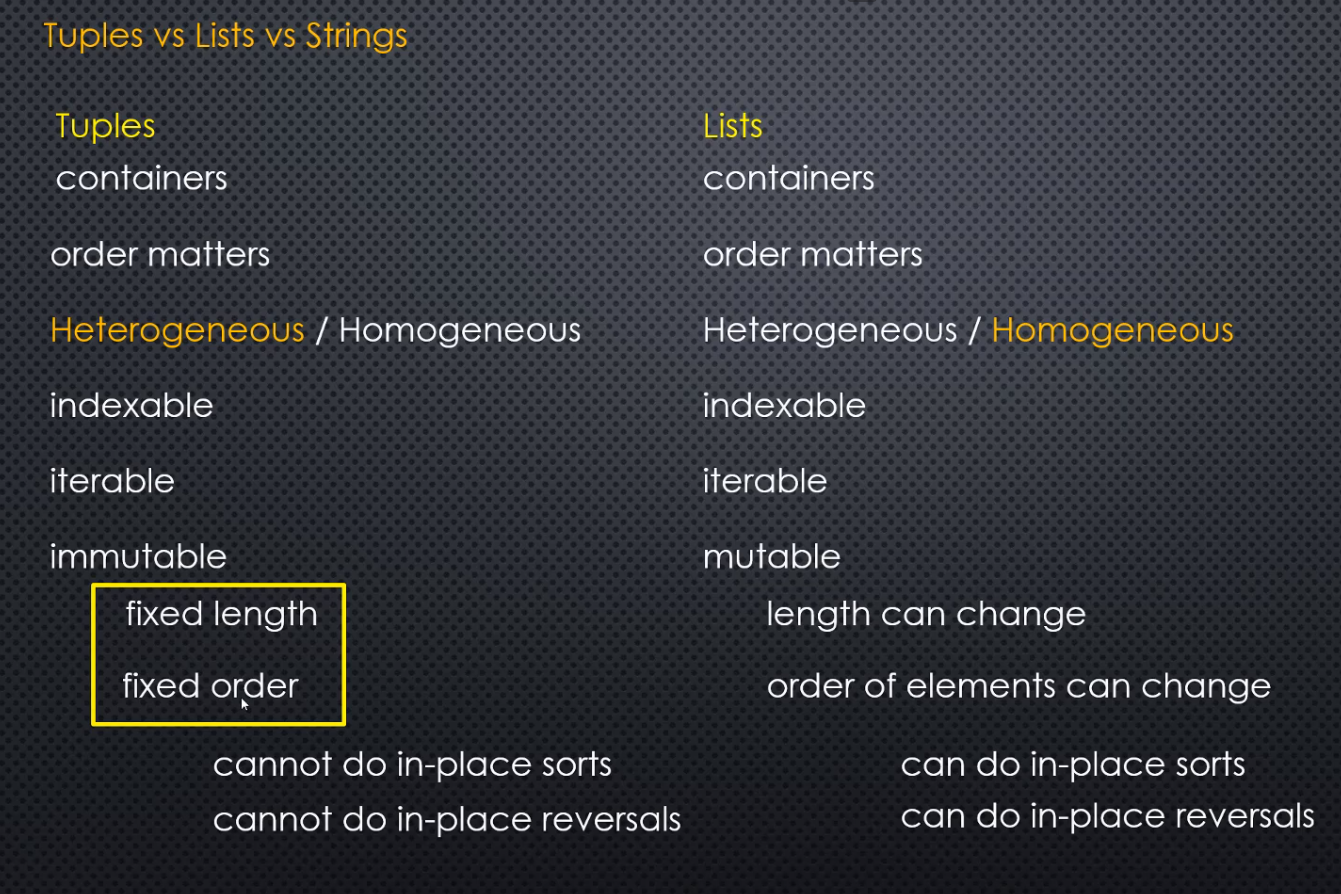

####   custom function to get list of matching indices

In [71]:
def get_matching_indices(lst, pattern):
    return [i for i, item in enumerate(lst) if item == pattern]

In [72]:
my_list = ["apple", "banana", "apple", "orange", "apple"]
pattern = "apple"

matching_indices = get_matching_indices(my_list, pattern)
print(matching_indices)

[0, 2, 4]


### Experiments with creating modules

In [6]:
import types

In [7]:
types

<module 'types' from '/home/rob/anaconda3/envs/textgen/lib/python3.10/types.py'>

In [5]:
from types import ModuleType

In [6]:
isinstance(calendar, ModuleType)

True

In [7]:
mymodule = ModuleType("mytestmodule","this is my test module")

In [8]:
mymodule

<module 'mytestmodule'>

In [10]:
mymodule.__dict__

{'__name__': 'mytestmodule',
 '__doc__': 'this is my test module',
 '__package__': None,
 '__loader__': None,
 '__spec__': None}

In [11]:
mymodule.pi = 3.14

In [12]:
mymodule.__dict__

{'__name__': 'mytestmodule',
 '__doc__': 'this is my test module',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 'pi': 3.14}

In [13]:
mymodule.hello = lambda:  'Hello!'

In [14]:
mymodule.hello()

'Hello!'

###  experements with ctypes   

In [30]:
import ctypes

In [31]:
a = ctypes.c_long(200)

In [32]:
ptr = ctypes.pointer(a)

In [33]:
print(ptr)

In [34]:
print(ptr.contents)

c_long(200)


In [35]:
print(ptr.contents.value)

200


In [36]:
print(id(a))

140352219034560
